In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm
from sklearn.metrics import auc
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

### Data Generation & Dummy Model

In [2]:
# Data
X = np.linspace(0, 2, 20)
Y = np.array([0, 0, 0, 1, 0, 1,0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

# Defining dummy model
def model(x, a=5):
    return 1/(1+np.exp(-x*a+a))

### Plotting the data & Model Prediction

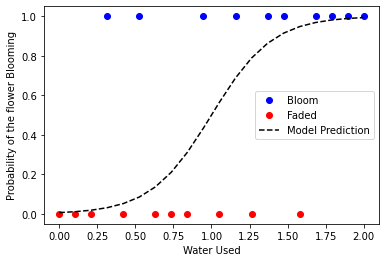

In [3]:
# Plot data
plt.scatter(X[Y==1], Y[Y==1], color='blue', label="Bloom")
plt.scatter(X[Y==0], Y[Y==0], color='red', label="Faded")
plt.plot(X, [model(x) for x in X], 'k--', label="Model Prediction")
plt.xlabel("Water Used")
plt.ylabel("Probability of the flower Blooming")
plt.legend()
plt.show()

### Other models with same Accuracy

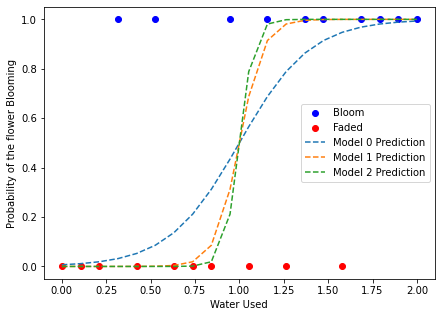

In [4]:
# Plot data
plt.figure(figsize=(7,5))
plt.scatter(X[Y==1], Y[Y==1], color='blue', label="Bloom")
plt.scatter(X[Y==0], Y[Y==0], color='red', label="Faded")
for i, a in enumerate([5, 15, 25]):
    plt.plot(X, [model(x, a) for x in X], '--', label=f"Model {i} Prediction")
plt.xlabel("Water Used")
plt.ylabel("Probability of the flower Blooming")
plt.legend()
plt.show()

### Plotting ROC Curves

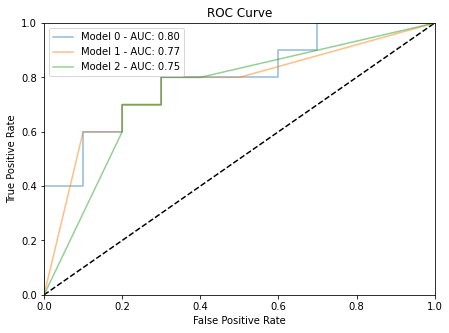

In [6]:
plt.figure(figsize=(7, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# For every model
for i, a in enumerate([5, 15, 25]):
    # Initialize arrays
    fpr_list = []
    tpr_list = []
    thr_list = np.linspace(0, 1, 100)

    # For every Threshold
    for thr in thr_list:
        # Get model Predictions
        predictions = np.array([model(x, a) for x in X])

        # Calculate TP, FN, FP, TN
        TP = np.sum((predictions > thr) & (Y == 1))
        FN = np.sum((predictions <= thr) & (Y == 1))
        FP = np.sum((predictions > thr) & (Y == 0))
        TN = np.sum((predictions <= thr) & (Y == 0))

        # False Positive Rate & True Positive Rate
        fpr = FP/(FP+TN)
        tpr = TP/(TP+FN)

        # Append to lists (latter going to be plotted)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    # Plot ROC
    plt.plot(fpr_list, tpr_list, label="Model {} - AUC: {:.2f}".format(i, auc(fpr_list, tpr_list)), alpha=0.5)
    
plt.legend()
plt.show()


### Code for the animation used

In [ ]:
# 3d plot 3
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

def init():
    ax.scatter(X[Y==1], Y[Y==1], color='blue', label="Bloom")
    ax.scatter(X[Y==0], Y[Y==0], color='red', label="Faded")
    ax.plot(X, [model(x) for x in X], 'k--', label="Model Prediction")
    ax.set_xlabel("Water Used")
    ax.set_ylabel("Probability of the flower Blooming")
    ax.legend()
    return fig,

def animate(i):
    thr = i/20
    predictions = np.array([model(x) for x in X])

    # Calculate TP, FN, FP, TN
    TP = np.sum((predictions > thr) & (Y == 1))
    FN = np.sum((predictions <= thr) & (Y == 1))
    FP = np.sum((predictions > thr) & (Y == 0))
    TN = np.sum((predictions <= thr) & (Y == 0))

    # False Positive Rate & True Positive Rate
    fpr = FP/(FP+TN)
    tpr = TP/(TP+FN)
    plt.cla()

    ax.set_title(f"TPR = {tpr} & FPR = {fpr}")
    ax.scatter(X[Y==1], [model(x) for x in  X[Y==1]], color='blue', label="Bloom")
    ax.scatter(X[Y==0], [model(x) for x in  X[Y==0]], color='red', label="Faded")
    ax.plot(X, [model(x) for x in X], 'k--', label="Model Prediction")
    ax.hlines(y=thr, xmin=0, xmax=2, color='black', linewidth=2, label="Threshold = {:.2f}".format(thr))

    ax.set_xlabel("Water Used")
    ax.set_ylabel("Probability of the flower Blooming")
    ax.legend()
    #plt.legend()
    

    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=21, interval=1000, blit=True)
# Save
anim.save('basic_animation4.mp4', fps=5, bitrate=500, codec="libx264", extra_args=['-pix_fmt', 'yuv420p'],dpi=100)